In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import lec7_graphs as afx

In [13]:
df = pd.read_csv('vertebrate.csv')
print(df.sample(5, random_state=16254))

       name  warm_blood  gives_birth  aquatic  aerial  has_legs  hibernates  \
0     human           1            1        0       0         1           0   
2    salmon           0            0        1       0         0           0   
3     whale           1            1        1       0         0           0   
6       bat           1            1        0       1         1           1   
11  penguin           1            0        1       0         1           0   

      class  
0   mammals  
2    fishes  
3   mammals  
6   mammals  
11    birds  


In [14]:
# recodificamos en mamiferos/no mamiferos
df['class'] = df['class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
# guardamos los nombres de las clases en un nuevo objeto
store_y_labels = df['class'].unique()
# recodificamos de forma binaria
df['class'] = np.where(df['class'] == 'mammals', 1, 0)
# eliminamos atributos irrelevantes de la matriz de atributos
X_mat=df.drop(columns=['name', 'class'])
# Implementamos nuestra función y la guardamos en un nuevo objeto
dec_tree = afx.demo_classfication_tree(X_mat, df['class'], store_y_labels)
# renderizamos el objeto
type(dec_tree)

pydotplus.graphviz.Dot

In [15]:
Image(dec_tree.create_png())

InvocationException: GraphViz's executables not found

In [16]:
#Query 1: ¿Da a luz?
question_1_pos = df.query('gives_birth == 1')
question_1_neg = df.query('gives_birth == 0')

In [17]:
question_1_neg['class'].value_counts()

0    9
Name: class, dtype: int64

In [18]:
question_1_pos['class'].value_counts()

1    5
0    1
Name: class, dtype: int64

In [20]:
# Query 2: ¿Es de sangre caliente?
question_2_pos = question_1_pos.query('warm_blood == 1')
question_2_neg = question_1_pos.query('warm_blood == 0')

In [21]:
question_2_pos['class'].value_counts()

1    5
Name: class, dtype: int64

In [22]:
question_2_neg['class'].value_counts()

0    1
Name: class, dtype: int64

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lec7_graphs as afx
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
df = pd.read_csv('cadata.csv', header=1).drop(columns='1')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedianHouseValue    20640 non-null float64
MedianIncome        20640 non-null float64
MedianHouseAge      20640 non-null float64
TotalRooms          20640 non-null float64
TotalBedrooms       20640 non-null float64
Population          20640 non-null float64
Households          20640 non-null float64
Latitude            20640 non-null float64
Longitude           20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
print(df.sample(2,random_state=11238))

       MedianHouseValue  MedianIncome  MedianHouseAge  TotalRooms  \
16934          237500.0        3.8317             9.0      1150.0   
49             112500.0        1.7750            40.0       946.0   

       TotalBedrooms  Population  Households  Latitude  Longitude  
16934          287.0       377.0       243.0     37.56    -122.32  
49             375.0       700.0       352.0     37.82    -122.27  


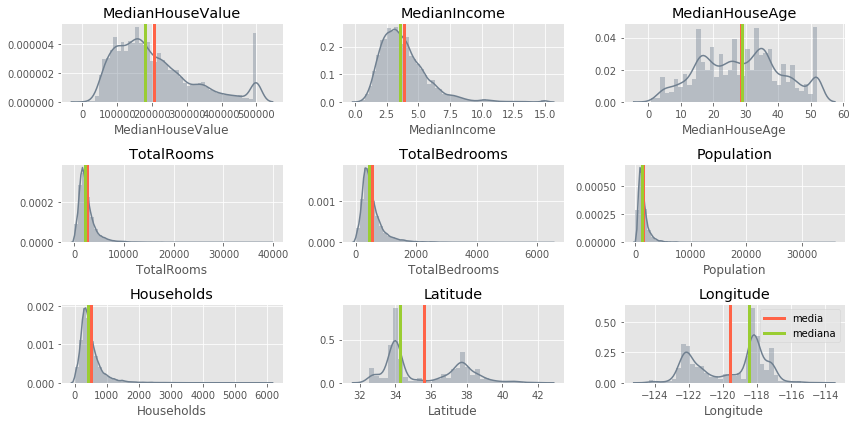

In [26]:
rows, cols = df.shape
cols = np.sqrt(cols)
plt.figure(figsize=(12, 6))
for index, (colname, serie) in enumerate(df.iteritems()):
    plt.subplot(cols, cols, index + 1)
    sns.distplot(serie, color='slategrey')
    plt.axvline(np.mean(serie), color='tomato', label = "media", lw=3)
    plt.axvline(np.median(serie), color='yellowgreen', label='mediana', lw=3)
    plt.title(colname)
plt.tight_layout()
plt.legend()

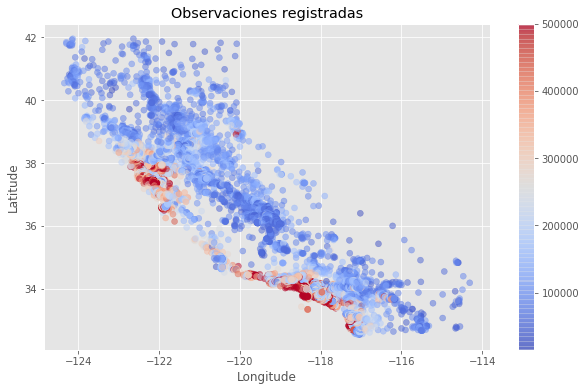

In [27]:
plt.scatter(df['Longitude'],
            df['Latitude'],
            c = df['MedianHouseValue'],
            cmap='coolwarm',
            alpha=.5)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Observaciones registradas');

In [28]:
from sklearn.model_selection import  train_test_split
# Vamos a trabajar con el logaritmo del vector para reducir no linealidad
df['log_MedianHouseValue'] = np.log(df['MedianHouseValue'])
# Sobreescribimos medianincome a log(medianincome)
df['log_MedianIncome'] = np.log(df['MedianIncome'])
# Definimos nuestro vector objetivo
y = df['log_MedianHouseValue']
# Definimos nuestra matriz de atributos y eliminamos irrelevantes
X = df.drop(columns=['MedianHouseValue', 'log_MedianHouseValue', 'MedianIncome'])
# Generamos muestras de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=11238)

In [29]:
from sklearn.tree import DecisionTreeRegressor
# Implementamos nuestro modelo sin modificar hiperparametros
dec_tree = DecisionTreeRegressor().fit(X_train, y_train)

In [30]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
print("Test MSE:", mean_squared_error(y_test,
dec_tree.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test,
dec_tree.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree.predict(X_test)).round(5))

Test MSE: 0.10506
Test MAE: 0.15623
Test R2: 0.6809


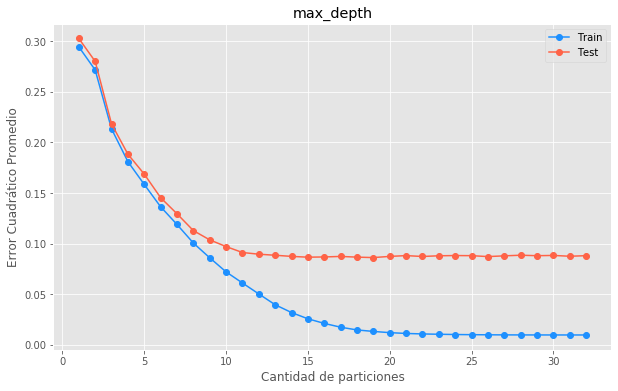

In [31]:
# generamos subconjuntos específicos para el problema de dos atributos
x_tr, x_te, y_tr, y_te = train_test_split(df.loc[:, ['Longitude', 'Latitude']], 
                                          df['log_MedianHouseValue'],
                                          test_size=.33, random_state=11238)
# simulamos el desempeño en el rango del hiperparámetro
afx.train_test_over_params(DecisionTreeRegressor(),
                           {'max_depth': np.linspace(1, 32, 32)},
                           x_tr, x_te, y_tr, y_te)
plt.xlabel('Cantidad de particiones');
plt.ylabel('Error Cuadrático Promedio');

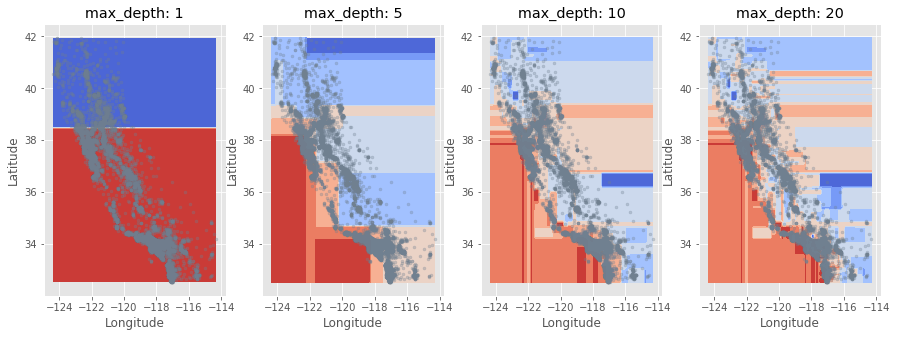

In [32]:
plt.figure(figsize=(15, 5))
# para cada valor predefinido del hiperparámetro
for index, value in enumerate([1, 5, 10, 20]):
    plt.subplot(1, 4, index + 1)
    # Implementamos un modelo con el ajuste específico
    tmp_model = DecisionTreeRegressor(max_depth=value)
    # Visualizamos la superficie de respuesta
    afx.plot_decision_function(tmp_model, df, 'Longitude', 'Latitude', 'log_MedianHouseValue',colorbar=False)
    plt.title("max_depth: {}".format(value))

In [34]:
afx.train_test_over_params(DecisionTreeRegressor(),
                           {'max_features': list(range(1,X_train.shape[1]))},
                           X_train, X_test, y_train, y_test)

In [35]:
afx.plot_importance(dec_tree, X.columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

In [36]:
afx.train_test_over_params(DecisionTreeRegressor(),
                           {'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)},
                           X_train, X_test, y_train, y_test)
plt.xlabel('Porcentaje de datos para considerar partición')
plt.ylabel('Error Cuadrático Promedio');

In [37]:
plt.figure(figsize=(16, 10))
for index, value in enumerate([0.1, 0.3,0.6, 0.9]):
    plt.subplot(1, 4, index + 1)
    tmp_model = DecisionTreeRegressor(min_samples_split=value)
    afx.plot_decision_function(tmp_model, df, 'Longitude', 'Latitude','log_MedianHouseValue',colorbar=False)
    plt.title("min_samples_split: {}".format(value))

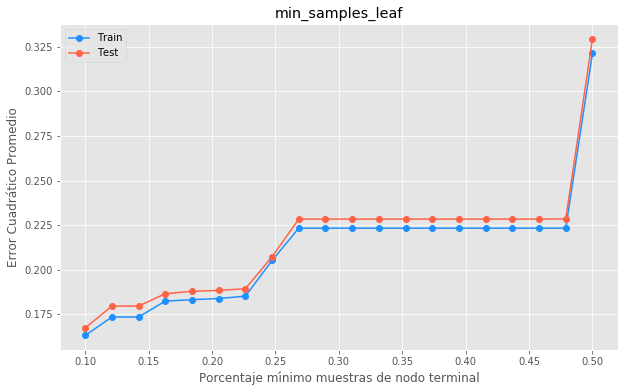

In [38]:
afx.train_test_over_params(DecisionTreeRegressor(),
                           {'min_samples_leaf': np.linspace(0.1, 0.5, 20,endpoint=True)},
                           X_train, X_test, y_train, y_test)
plt.xlabel('Porcentaje mínimo muestras de nodo terminal')
plt.ylabel('Error Cuadrático Promedio');

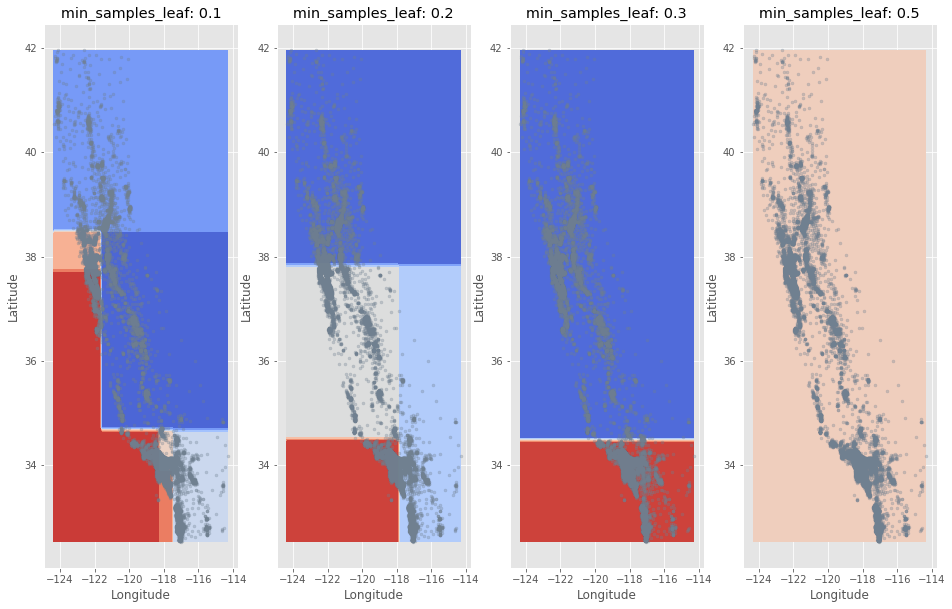

In [40]:
plt.figure(figsize=(16, 10))
for index, value in enumerate([0.1,.20, .3, 0.5]):
    plt.subplot(1, 4, index + 1)
    tmp_model = DecisionTreeRegressor(min_samples_leaf=value)
    afx.plot_decision_function(tmp_model, df, 'Longitude', 'Latitude','log_MedianHouseValue',colorbar=False)
    plt.title("min_samples_leaf: {}".format(value))

In [41]:
from sklearn.tree import DecisionTreeClassifier
# Importamos la base de datos
df = pd.read_csv('voting.csv').drop(columns='Unnamed: 0')
print(df.sample(1, random_state=11238))

    region  population sex   age education   income  statusquo vote
206      N        3750   M  21.0         P  15000.0   -0.04558    N


In [42]:
rows = 2
cols = df.shape[1] // rows
for index, (colnames, serie) in enumerate(df.iteritems()):
    plt.subplot(rows, cols, index + 1)
    if serie.dtype == 'object':
        sns.countplot(serie.dropna())
        plt.axhline(serie.value_counts().mean(), color='forestgreen',linestyle='--')
        plt.title(colnames)
    else:
        sns.distplot(serie.dropna(), color='slategrey')
        plt.axvline(serie.mean(), color='forestgreen', linestyle='--')
        plt.title(colnames)
plt.tight_layout()

In [43]:
# Vamos a binarizar cada variable categórica, ignorando la primera categoría de referencia
# Región del país
df = pd.concat([df, pd.get_dummies(df['region'], drop_first=True,prefix='region')], axis=1)
# Nivel educacional del encuestado
df = pd.concat([df, pd.get_dummies(df['education'], drop_first=True,prefix='ed')], axis=1)
# Sexo del encuestado
df = pd.concat([df, pd.get_dummies(df['sex'], drop_first=True, prefix='sex')],axis=1)
# Intención de voto
df = pd.concat([df, pd.get_dummies(df['vote'], drop_first=False,prefix='vote')], axis=1)
# Botamos las variables originales
df = df.drop(columns=['region', 'sex', 'education', 'vote'])
print(df.sample())

     population   age  income  statusquo  region_M  region_N  region_S  \
210        3750  59.0  7500.0    1.41416         0         1         0   

     region_SA  ed_PS  ed_S  sex_M  vote_A  vote_N  vote_U  vote_Y  
210          0      0     0      1       0       0       0       1  


In [44]:
# Nos aseguramos de limpiar los datos perdidos
df = df.dropna()
# generamos las muestras definiendo la matriz de atributos
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'population':'sex_M'],
                                                    # el vector objetivo
                                                    df['vote_N'],
                                                    # el tamaño de la muestra a dejar como validación
                                                    test_size=.33,
                                                    # definiendo la semilla pseudoaleatoria
                                                    random_state=11238)

In [45]:
# importamos la clase GridSearchCV
from sklearn.model_selection import GridSearchCV

In [46]:
%time
dec_tree_grid_cv = GridSearchCV(DecisionTreeClassifier(),
                                # evaluamos 10 escenarios
                                {'min_samples_split': np.linspace(0.1, 1.0,10),
                                 # implementando 2 criterios de partición
                                 'criterion': ['gini', 'entropy'],
                                 # con una profundidad de ramas hasta 32
                                 'max_depth': np.linspace(1, 32, 32),
                                 # evaluando 10 escenarios
                                 'min_samples_leaf': np.linspace(0.1, 0.5,10),
                                 # evaluando todos los atributos en la matriz
                                 'max_features': list(range(1,X_train.shape[1]))},
                                # Con 5 validaciones cruzadas
                                cv=5,
                                # Ocupando todos los núcleos del computador
                                n_jobs=-1).fit(X_train, y_train)

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 38.9 µs


In [47]:
dec_tree_grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 32.0,
 'max_features': 5,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.2}

In [48]:
dec_tree_grid_cv.best_score_

0.8328530259365994

In [49]:
dec_tree_grid_cv.best_estimator_.feature_importances_

array([0.        , 0.04546249, 0.        , 0.82718816, 0.        ,
       0.        , 0.        , 0.        , 0.10667289, 0.        ,
       0.02067646])

In [50]:
colnames = df.loc[:, 'population':'sex_M'].columns
afx.plot_importance(dec_tree_grid_cv.best_estimator_, colnames)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dec_tree_grid_cv.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       572
           1       0.52      0.69      0.59       283

    accuracy                           0.69       855
   macro avg       0.67      0.69      0.67       855
weighted avg       0.72      0.69      0.70       855

